# Pokemon Data Analysis

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pokemon_data.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

##### We will analyze the dataset for different attributes

1. TO ANALYZE HOW MANY GENERATIONS OF POEKMON ARE THERE ACCORDING TO THE DATASET

In [6]:
print(set(df['Generation']))

{1, 2, 3, 4, 5, 6}


2. TO ANALYZE THE NO. OF POKEMONS IN EACH GENERATION

In [7]:
poke_count = {}
count = 1
for item in df['Generation']:
    if item not in poke_count.keys():
        poke_count.update({item:count})
    else:
        poke_count[item] += 1
poke_count

{1: 166, 2: 106, 3: 160, 4: 121, 5: 165, 6: 82}

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


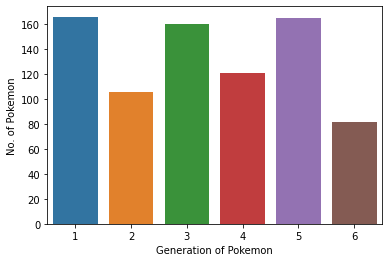

In [8]:
# Visualizing the generations
gen_key = list(poke_count.keys())
gen_value = list(poke_count.values())
sns.barplot(gen_key, gen_value)
plt.xlabel('Generation of Pokemon')
plt.ylabel('No. of Pokemon')
plt.show()

3. TO FIND DIFFERENT TYPES OF POEKMON ACCORDING TO 'TYPE 1'

In [9]:
Types = set(df['Type 1'])
print(Types)
print(f"\nThere are {len(Types)} types of Pokemon")

{'Bug', 'Fire', 'Dark', 'Rock', 'Ground', 'Steel', 'Ice', 'Flying', 'Normal', 'Poison', 'Psychic', 'Ghost', 'Fighting', 'Dragon', 'Fairy', 'Grass', 'Electric', 'Water'}

There are 18 types of Pokemon


4. TO FIND TOTAL NO. OF POKEMON OF EACH TYPE

In [10]:
type_count = {}
count = 1
for item in df['Type 1']:
    if item not in type_count.keys():
        type_count.update({item:count})
    else:
        type_count[item] += 1
print(type_count)

{'Grass': 70, 'Fire': 52, 'Water': 112, 'Bug': 69, 'Normal': 98, 'Poison': 28, 'Electric': 44, 'Ground': 32, 'Fairy': 17, 'Fighting': 27, 'Psychic': 57, 'Rock': 44, 'Ghost': 32, 'Ice': 24, 'Dragon': 32, 'Dark': 31, 'Steel': 27, 'Flying': 4}


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


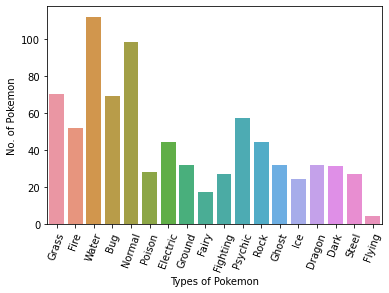

In [11]:
type_key = list(type_count.keys())
type_value = list(type_count.values())
sns.barplot(type_key, type_value)
plt.xlabel('Types of Pokemon')
plt.ylabel('No. of Pokemon')
plt.xticks(rotation=70)
plt.show()

5. TO FIND THE TOTAL PROWESS OF EACH POKEMON AND THEN FIND THE STRONGEST AND WEAKEST POKEMON

In [12]:
# Calculating the Total power of each Pokemon
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

In [13]:
# Sorting the data frame in the decreasing value of Total
res = df.sort_values(['Total'], ascending=False)

# To get the name of strongest pokemon
strongest = res.iloc[0,1]

# To get the name of weakest Pokemon
weakest = res.iloc[-1,1] 

print(f"The strongest Pokemon is {strongest}")
print(f"The weakest Pokemon is {weakest}")

The strongest Pokemon is RayquazaMega Rayquaza
The weakest Pokemon is Sunkern


In [14]:
# 2nd approach of getting the strongest and the weakest Pokemon is:
max_total = max(df['Total'])
min_total = min(df['Total'])
for index, row in df.iterrows():
    if row['Total'] == max_total:
        max_name = row['Name']
    elif row['Total'] == min_total:
        min_name = row['Name']
        
print('Pokemon with the highest total is:',max_name)
print('Pokemon with the lowest total is:',min_name)

Pokemon with the highest total is: RayquazaMega Rayquaza
Pokemon with the lowest total is: Sunkern


0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Name: Total, Length: 800, dtype: int64

6. TO GET THE HIGHEST RATING ATTACK, SPEED, DEFNESE, HP ETC.

In [70]:
cols = list(df.columns)
stats = cols[4:10]

In [16]:
max_of_stats = {}
min_of_stats = {}
for item in stats:
    max_of_stats.update({item:max(df[item])})
    min_of_stats.update({item:min(df[item])})    
    
print("Dictionary of max stats: ", max_of_stats)
print("Dictionary of min stats: ", min_of_stats)
    

Dictionary of max stats:  {'HP': 255, 'Attack': 190, 'Defense': 230, 'Sp. Atk': 194, 'Sp. Def': 230, 'Speed': 180}
Dictionary of min stats:  {'HP': 1, 'Attack': 5, 'Defense': 5, 'Sp. Atk': 10, 'Sp. Def': 20, 'Speed': 5}


7. TO GET THE POKEMONS WITH HIGHEST DIFFERENT ATTRIBUTES

In [17]:
for item in stats:
    mid = df.sort_values(item, ascending=False)
    print(f"{mid.iloc[0,1]} has maximum {item} that is {max(df[item])}\n")

Blissey has maximum HP that is 255

MewtwoMega Mewtwo X has maximum Attack that is 190

Shuckle has maximum Defense that is 230

MewtwoMega Mewtwo Y has maximum Sp. Atk that is 194

Shuckle has maximum Sp. Def that is 230

DeoxysSpeed Forme has maximum Speed that is 180



8. TO GET THE STRONG POKEMONS i.e WHO HAVE TOTAL > 600

In [36]:
strong_poke=[]
for index, item in df.iterrows():
    if item['Total'] > 600:
        strong_poke.append(item['Name'])
print('There are total', len(strong_poke), "strong pokemons.")

There are total 48 strong pokemons.


In [41]:
list(Types)

['Bug',
 'Fire',
 'Dark',
 'Rock',
 'Ground',
 'Steel',
 'Ice',
 'Flying',
 'Normal',
 'Poison',
 'Psychic',
 'Ghost',
 'Fighting',
 'Dragon',
 'Fairy',
 'Grass',
 'Electric',
 'Water']

9. TO GET THE STRONGEST POKEMON IN EACH TYPE

In [58]:
strong_poke_acc_type = {}
for item in Types:
    a,b = [], []
    for index, rows in df.iterrows():
        if rows['Type 1'] == item:
            a.append(rows['Total'])
            b.append(rows['Name'])
    index_value = a.index(max(a))
    strong_poke_name = b[index_value]
    strong_poke_acc_type.update({item:strong_poke_name})
strong_poke_acc_type

{'Bug': 'PinsirMega Pinsir',
 'Fire': 'Ho-oh',
 'Dark': 'Yveltal',
 'Rock': 'TyranitarMega Tyranitar',
 'Ground': 'GroudonPrimal Groudon',
 'Steel': 'MetagrossMega Metagross',
 'Ice': 'Articuno',
 'Flying': 'TornadusIncarnate Forme',
 'Normal': 'Arceus',
 'Poison': 'Crobat',
 'Psychic': 'MewtwoMega Mewtwo X',
 'Ghost': 'GiratinaAltered Forme',
 'Fighting': 'LucarioMega Lucario',
 'Dragon': 'RayquazaMega Rayquaza',
 'Fairy': 'Xerneas',
 'Grass': 'SceptileMega Sceptile',
 'Electric': 'AmpharosMega Ampharos',
 'Water': 'KyogrePrimal Kyogre'}

10. FINDING THE STRONGEST POKEMON ON THE BASIS OF HP, ATTACK etc. IN EACH TYPE

In [80]:
strongest_poke_dict = {}
for k in stats:
    print(f"On the basis of {k}")
    for item in Types:
        a, b = [], []
        for index, rows in df.iterrows():
            if item == rows['Type 1']:
                a.append(rows['Total'])
                b.append(rows['Name'])
        index_value = a.index(max(a))
        strongest_poke = b[index_value] 
        strongest_poke_dict.update({item:strongest_poke})
    print(strongest_poke_dict,"\n")

On the basis of HP
{'Bug': 'PinsirMega Pinsir', 'Fire': 'Ho-oh', 'Dark': 'Yveltal', 'Rock': 'TyranitarMega Tyranitar', 'Ground': 'GroudonPrimal Groudon', 'Steel': 'MetagrossMega Metagross', 'Ice': 'Articuno', 'Flying': 'TornadusIncarnate Forme', 'Normal': 'Arceus', 'Poison': 'Crobat', 'Psychic': 'MewtwoMega Mewtwo X', 'Ghost': 'GiratinaAltered Forme', 'Fighting': 'LucarioMega Lucario', 'Dragon': 'RayquazaMega Rayquaza', 'Fairy': 'Xerneas', 'Grass': 'SceptileMega Sceptile', 'Electric': 'AmpharosMega Ampharos', 'Water': 'KyogrePrimal Kyogre'} 

On the basis of Attack
{'Bug': 'PinsirMega Pinsir', 'Fire': 'Ho-oh', 'Dark': 'Yveltal', 'Rock': 'TyranitarMega Tyranitar', 'Ground': 'GroudonPrimal Groudon', 'Steel': 'MetagrossMega Metagross', 'Ice': 'Articuno', 'Flying': 'TornadusIncarnate Forme', 'Normal': 'Arceus', 'Poison': 'Crobat', 'Psychic': 'MewtwoMega Mewtwo X', 'Ghost': 'GiratinaAltered Forme', 'Fighting': 'LucarioMega Lucario', 'Dragon': 'RayquazaMega Rayquaza', 'Fairy': 'Xerneas', 'Gr